## Set Up

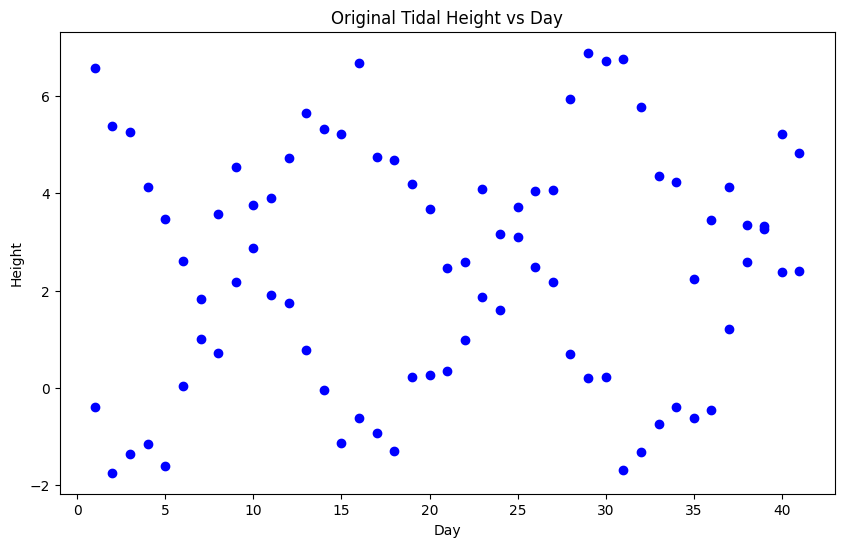

Fitted Parameters:
 a1: 115.1037191369841
 a2: 114.67626777105612
 w1: 0.4470038291536871
 w2: 0.4464540109816501
 p1: 828.9786560619394
 p2: 648.9093291248086
 t0: 1826.8107800860882


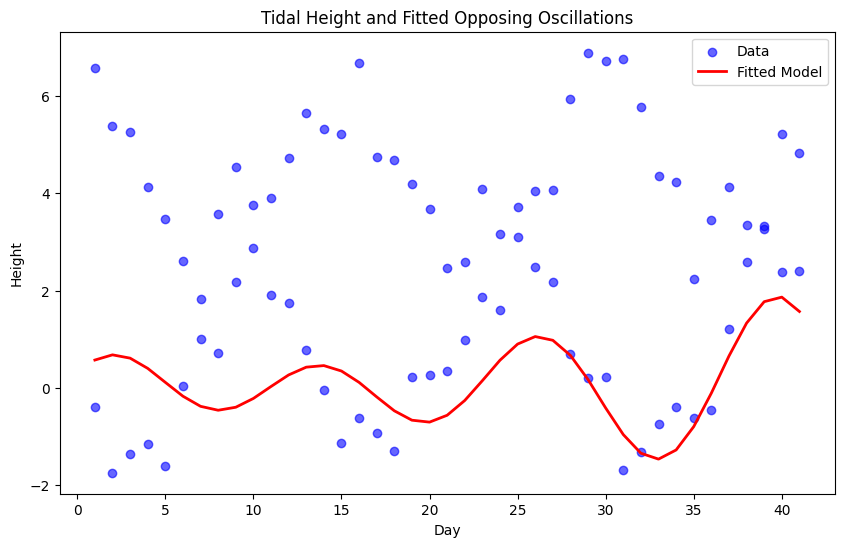

First few Day and Height values:
Day: [1 1 2 2 3]
Height: [ 6.57 -0.39  5.38 -1.74  5.26]


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the data from the file
data = np.genfromtxt("ASTR19_F24_group_project_data.txt", dtype=[('myint', 'i8'), ('mystring', 'S5'), ('myfloat', 'f8')])

# Setting empty lists to fill up with column data
day = []
time = []
height = []

# Looping over every row and extracting the relevant data
for i in range(82):  # Assuming there are 82 data points
    day.append(data[i][0])  # Day (could be converted to a proper time format if necessary)
    time.append(data[i][1].decode("utf-8"))  # Decode byte string to normal string for time
    height.append(data[i][2])  # Tidal height

# Convert the lists to numpy arrays for easier manipulation
day = np.array(day)
height = np.array(height)

# Plotting the original data
plt.figure(figsize=(10, 6))
plt.scatter(day, height, color='b', label="Data")
plt.xlabel("Day")
plt.ylabel("Height")
plt.title("Original Tidal Height vs Day")
plt.show()
#  print the fitted parameters to check
print(f"Fitted Parameters:\n a1: {a1_fit}\n a2: {a2_fit}\n w1: {w1_fit}\n w2: {w2_fit}\n p1: {p1_fit}\n p2: {p2_fit}\n t0: {t0_fit}")


# Define the oscillatory model function with two distinct opposing oscillations
def tidal_model(t, a1, a2, w1, w2, p1, p2, t0):
    """
    a1, a2: amplitudes of the two oscillations
    w1, w2: angular frequencies (2 * pi / period)
    p1, p2: phase shifts (p2 is shifted by 180 degrees relative to p1)
    t0: time shift (optional)
    """
    # Two oscillations with opposite phases
    return a1 * np.cos(w1 * (t - t0) + p1) + a2 * np.cos(w2 * (t - t0) + p2)

# do we need initial guess for the parameters [a1, a2, w1, w2, p1, p2, t0] ??
p0 = [6.57, -0.39, 2 * np.pi / 12, 2 * np.pi / 24, 0, np.pi, 0] 

# Fit the model to the data using curve_fit
params, params_cov = curve_fit(tidal_model, day, height, p0=p0)

# Extract the fitted parameters
a1_fit, a2_fit, w1_fit, w2_fit, p1_fit, p2_fit, t0_fit = params

# Generate the fitted curve using the fitted parameters
fitted_heights = tidal_model(day, a1_fit, a2_fit, w1_fit, w2_fit, p1_fit, p2_fit, t0_fit)

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(day, height, color='b', label="Data", alpha=0.6)
plt.plot(day, fitted_heights, 'r-', label="Fitted Model", linewidth=2)
plt.xlabel("Day")
plt.ylabel("Height")
plt.title("Tidal Height and Fitted Opposing Oscillations")
plt.legend()
plt.show()

# Print out the first few values of the day and height data to check
print("First few Day and Height values:")
print(f"Day: {day[:5]}")
print(f"Height: {height[:5]}")
